### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. Vamos usar 3 arquivos para a análise:

    1. CadastroFuncionarios
    2. CadastroClientes
    3. BaseServiçoesPrestados


### O que queremos descobrir?
Temos algumas perguntas que precisam ser respondidas:

    1. O valor total da folha salarial - Qual foi o gasto total com salários de funcionários?
    2. Qual foi o faturamento da empresa?
    3. Qual o percentual de funcionários que já fecharam algum contrato?
    4. Quantos contratos cada área da empresa conseguiu fechar?
    5. Qual o total de funcionários por área?
    6. Qual o ticket médio mensal dos contratos?

#### Importando Bibliotecas e Arquivos

In [1]:
# Importando biblioteca
import pandas as pd

# Carregando arquivos
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv',sep=';')
servicos_df = pd.read_excel('BaseServicosPrestados.xlsx')


#### Exibindo as tabelas
É importante conhecermos as colunas das tabelas que vamos trabalhar

In [2]:
display(funcionarios_df)
display(clientes_df)
display(servicos_df)

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


#### Tratamento de Dados
- Excluir colunas que não serão utilizadas
- Verificar tipos de colunas
- Verificar se há valores nulos

In [3]:
# Excluindo Colunas
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)

# Verificando se a exclusão das colunas Estado Civil e Cargo foi realizada
funcionarios_df.head(1)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações


In [4]:
# Verificando se há informações nulas e conhecendo o tipo de cada coluna
funcionarios_df.info()
print()
clientes_df.info()
print()
servicos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Nome Completo   114 non-null    object 
 2   Salario Base    114 non-null    int64  
 3   Impostos        114 non-null    float64
 4   Beneficios      114 non-null    float64
 5   VT              114 non-null    int64  
 6   VR              114 non-null    float64
 7   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 7.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             320 non-null    int64 
 1   Cliente                320 non-null    object
 2   Valor Contrato Mensal  320 non-null    int64 
dtypes: int64(2), object

### Respondendo as perguntas

#### 1. O valor total da folha salarial - Qual foi o gasto total com salários de funcionários?
Para responder essa pergunta, vamos criar uma coluna chamada "Salario Total" que terá o resultado da soma das seguintes colunas: 
   1. Salario Base	
   2. Impostos	
   3. Beneficios	
   4. VT	
   5. VR	

E depois vamos somar o valor da coluna 'Salario Total'.

In [5]:
funcionarios_df['Salario Total'] = funcionarios_df.iloc[:, 2:7].sum(axis=1)

total_folha_salarial = funcionarios_df['Salario Total'].sum()

print(f'O valor total da folha salarial é de R${total_folha_salarial:.2f}')

O valor total da folha salarial é de R$2717493.22


#### 2. Qual foi o faturamento da empresa?

Para essa questão, vamos unir os datasets BaseServicosPrestados e CadastroClientes. Isso porque na base de clientes temos o valor mensal gasto por cada cliente e na base de serviços temos a quantidade de meses que o cliente pagou. Então multiplicaremos uma informação pela outra.

Para unir as tabelas usaremos o merge. Para que a união ocorra é necessário que as tabelas tenham ao menos uma coluna em comum, pois a união é feita através do nome da coluna.

As tabelas BaseServicosPrestados e CadastroClientes tem a coluna 'ID Cliente' em comum.

Após a união de tabelas, criaremos uma coluna chamada 'Faturamento Total', que será a multiplicação entre o valor do contrato e o tempo de contrato. Por fim, somaremos os valores da coluna 'Faturamento Total'.

In [6]:
# Unindo tabelas
faturamento_df = servicos_df.merge(clientes_df, on='ID Cliente')

# Verificando se a união funcionou
faturamento_df.head(1)

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Cliente,Valor Contrato Mensal
0,OS0001,67,1,14,Teixeira Gonçalves,540


In [7]:
faturamento_df['Faturamento Total'] = faturamento_df['Valor Contrato Mensal'] * faturamento_df['Tempo Total de Contrato (Meses)']
faturamento_total = faturamento_df['Faturamento Total'].sum()

print(f'O faturamento da empresa foi de R${faturamento_total:.2f}')

O faturamento da empresa foi de R$5519160.00


#### 3. Qual o percentual de funcionários que já fechou algum contrato?

Primeiramente, vou guardar em uma variável o valor total de funcionários da empresa. Para isso vou usar um count na tabela funcionarios_df na coluna de 'ID Funcionario'. As informações dessa tabela são únicas, ou seja, não há funcionários repetidos.

O mesmo funcionário pode ter fechado mais de um contrato. Então, na tabela de serviços prestados, vou utilizar o método unique, para contar somente uma vez cada funcionário. Após isso, vamos calcular a quantidade de funcionários que fecharam algum contrado dividido pela quantidade total de funcionários e assim obteremos o percentual.

In [8]:
# Verificando o número total de funcionário pelo ID (que não se repete) e guardando o número em uma variável
total_funcionarios = funcionarios_df['ID Funcionário'].count()

print(f'A empresa tem um total de {total_funcionarios} funcionários.')


A empresa tem um total de 114 funcionários.


In [9]:
# Usando unique na tabela de serviços
funcionario_fecha_contrato = servicos_df['ID Funcionário'].unique()

# O método unique retornou um array, então vamos contar os elementos do array
funcionario_fecha_contrato = len(funcionario_fecha_contrato)

print(f'{funcionario_fecha_contrato} funcionários fecharam algum contrato.')

99 funcionários fecharam algum contrato.


In [10]:
# Calculando o percentual de funcionários que fecharam contrato.
percentual_fecha_contrato = f'{funcionario_fecha_contrato / total_funcionarios:.0%}'
print(f'{percentual_fecha_contrato} dos funcionários fecharam algum contrato.')

87% dos funcionários fecharam algum contrato.


#### 4. Quantos contratos cada área da empresa conseguiu fechar?

Neste exercício vamos unir as tabelas de serviços com a de funcionários. Após isso, vamos contar quantas vezes cada área aparece.


In [18]:
# Unindo as tabelas
contratos_areas_df = servicos_df.merge(funcionarios_df, on='ID Funcionário')

# Contando valores da coluna área
contratos_areas_qtde = contratos_areas_df['Area'].value_counts()

# Exibindo resultado
display(contratos_areas_qtde)

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

#### 5. Qual o total de funcionários por área?

Exercício semelhante ao anterior. Vamos contar os valores da coluna Área, porém sem fazer merge dessa vez. Usaremos apenas a tabela de funcionários

In [19]:
# Contando valores da coluna área
funcionarios_df['Area'].value_counts()

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

<AxesSubplot:>

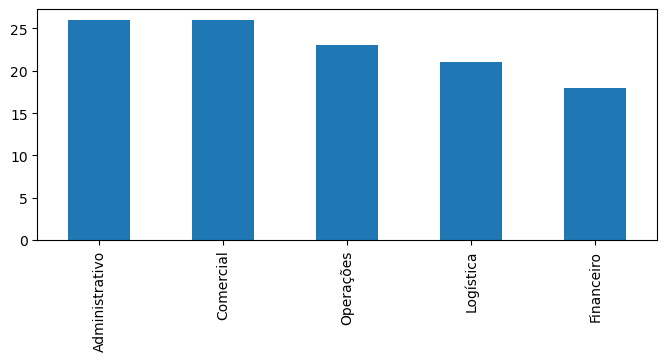

In [24]:
# Exibindo quantidade de funcionários por área em gráfico
funcionarios_df['Area'].value_counts().plot(kind='bar',figsize=(8,3))

#### 6. Qual o ticket médio mensal dos contratos?

Neste exercício, basta usar o método mean() para calcular a média da coluna que mostra os valores dos contratos.

In [25]:
# Calculando a média dos valores dos contratos
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print(f' O ticket médio mensal dos contratos é de R${ticket_medio:.2f}')

 O ticket médio mensal dos contratos é de R$2502.56


### Resumo

Através das questões respondidas, descobrimos que:
    
    1. O valor total da folha salarial é de 2.717.493,22
    2. O faturamento da empresa foi de 5.519.160,00 
    3. A empresa tem um total de 114 funcionário, sendo que 99 deles - que representam 87% do todo fecharam algum contrato
    4. O ticket médio mensal dos contratos é de 2.502,56

### Conclusão

A partir do resumo acima, podemos concluir que:

   1. Subtraindo o valor da folha salarial do faturamento, a empresa teve um lucro de 2.801.666,78 lucro/faturamento
   2. A área administrativa é a que mais fecha contratos e a de logística, a que menos fecha
   3. O número de funcionários por área é equilibrado, em média, cada área possui ~20% de funcionários
        